# Genetik Algoritma ile Amaç Fonksiyonu Optimizasyonu
## Senaryo 2: Endüstriyel Boya Karışımı

**Adı Soyadı:** Yeşim Ayma  
**Okul Numarası:** 2312721002  

**GitHub Repo Bağlantısı:**  
https://github.com/aymayesim/genetik_optimizasyonu

---

## 📌 Problem Tanımı

Bir fabrika, iki farklı pigmentin belirli oranlarda karıştırılmasıyla **ideal renk yoğunluğunu** elde etmek istemektedir.  
Amaç, verilen kısıtlar altında **renk kalitesi skorunu maksimize eden** pigment oranlarını bulmaktır.

Bu problem, doğrusal olmayan bir amaç fonksiyonu ve kısıtlar içerdiği için **Genetik Algoritma** kullanılarak çözülmüştür.

---

## 🎯 Amaç Fonksiyonu

Amaç fonksiyonu aşağıdaki gibidir:

\[
y = 5x_1 + 2x_2 - x_1 x_2
\]

Bu fonksiyon **maksimize edilmektedir**.

---

## 🔢 Değişkenler

- \(x_1\): Pigment A oranı (%) → [0, 100]  
- \(x_2\): Pigment B oranı (%) → [0, 100]

---

## ⚙️ Kısıtlar

- \(x_1 + x_2 = 100\)  
  *(Karışım toplamı %100 olmalıdır)*  

- \(x_1 \ge 30\)  
  *(Pigment A en az %30 kullanılmalıdır)*  




In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
POP_SIZE = 30 #Her nesilde 30 farklı pigment karışımı denenir
N_GENERATIONS = 100 #Algoritmayı 100 nesil boyunca çalıştırır
CROSSOVER_RATE = 0.8 #Çaprazlama oranı (%80) %20 olasılıkla ebeveynler aynen aktarılır
MUTATION_RATE = 0.2 #%20 olasılıkla mutasyona uğrar

X1_MIN, X1_MAX = 30, 100  #Pigment A’nın en az %30 kullanılması şartı x1’in alt sınırı olarak tanımlandı

In [ ]:
def objective(x1, x2):  #Problem tanımı / amaç fonksiyonu
    return 5*x1 + 2*x2 - (x1 * x2)

In [ ]:
def is_feasible(x1, x2): #kısıtlar
    if x1 < 30:
        return False
    if x1 > 100 or x2 < 0 or x2 > 100:
        return False
    if abs((x1 + x2) - 100) > 1e-6: #x1 + x2 = 100 kısıtı
        return False
    return True

def repair(ind): #Amaç: bireyi kısıtlara uygun hale getirmek
    x1 = max(X1_MIN, min(X1_MAX, ind[0])) #Pigment A oranını belirlenen alt ve üst sınırlar içine çekmek
    x2 = 100 - x1  # toplam 100 kuralı zorunlu uygulanır
    return [x1, x2] #Düzeltilmiş bireyi döndürür

In [ ]:
def create_individual(): #Tek bir çözüm üretme
    x1 = random.randint(X1_MIN, X1_MAX) #Başlangıçta pigment A oranını 30 ile 100 arasında rastgele seçme
    x2 = 100 - x1 #x2’nin otomatik hesaplanması
    return [x1, x2]

def create_population(n): #Başlangıç popülasyonu
    return [create_individual() for _ in range(n)] #Başlangıç popülasyonunu, kısıtlara uygun rastgele bireylerden oluştur(liste)

In [ ]:
def fitness(ind): #Fitness ne kadar yüksekse Bireyin seçilme ihtimali o kadar artar

    x1, x2 = ind #Pigment A ve B oranları ayrı değişkenlere atanır
    return objective(x1, x2)

In [ ]:
def rank_selection(population): #Rank seçiliminde bireylerin seçilme ihtimali doğrudan fitness değerine değil, popülasyon içindeki sıralamasına bağlıdır.
    ranked = sorted(population, key=fitness)   # Önce tüm bireyler fitness değerlerine göre sıralanır
    n = len(ranked)
    ranks = list(range(1, n+1))                # İyi bireyler daha yüksek seçilme şansı alır
    total = sum(ranks)             #Toplam olasılık alanı

    pick = random.uniform(0, total)  #Rastgele bir seçim noktası belirlenir
    current = 0
    for ind, r in zip(ranked, ranks):
        current += r
        if current >= pick:
            return ind


In [ ]:
def crossover(p1, p2):
    # Çaprazlama yapılmayacaksa ebeveynleri aynen döndürür
    if random.random() > CROSSOVER_RATE:
        return p1[:], p2[:]

    # Tek noktalı çaprazlama (x1 üzerinden)
    c1_x1 = p1[0]
    c2_x1 = p2[0]

    # Ebeveynlerin x1 değerlerini değiş tokuş et
    c1_x1, c2_x1 = c2_x1, c1_x1

    # Kısıtları zorunlu uygula
    c1 = repair([c1_x1, 100 - c1_x1])
    c2 = repair([c2_x1, 100 - c2_x1])

    return c1, c2


In [ ]:
def mutate(ind): #Karışım toplamı sabit olduğu için mutasyon yalnızca x1 üzerinde uygulandı
    x1 = ind[0]

    if random.random() < MUTATION_RATE: #Her birey %20 olasılıkla mutasyona uğrar
        x1 += random.choice([-3, -2, -1, 1, 2, 3])

    x1 = max(X1_MIN, min(X1_MAX, x1)) #Mutasyon sonrası birey tekrar kısıtlara uygun hale getirildi
    x2 = 100 - x1

    return [x1, x2]

In [ ]:
def genetic_algorithm():
    population = create_population(POP_SIZE) #başlangıç popülasyonu oluşturuluyor.
    best_history = []

    for gen in range(N_GENERATIONS): #Algoritma 100 nesil boyunca çalışıyor
        population.sort(key=fitness, reverse=True) #Popülasyon fitness’a göre azalan sıralanır
        best = population[0]
        best_history.append(fitness(best)) #en iyi skor kaydet

        print(f"Gen {gen:3d} | x1={best[0]}, x2={best[1]}, score={best_history[-1]:.2f}")

        new_pop = [best]  # elitizm En iyi birey direkt yeni nesle taşınır

        while len(new_pop) < POP_SIZE: #seçim + çaprazlama + mutasyon
            p1 = rank_selection(population)
            p2 = rank_selection(population)

            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)

            new_pop.append(c1)
            if len(new_pop) < POP_SIZE:
                new_pop.append(c2)

        population = new_pop

    population.sort(key=fitness, reverse=True) #en iyi çözümü ve nesillere göre en iyi skor değişimini döndürür
    return population[0], best_history


In [ ]:
best, history = genetic_algorithm()

print("\n*** SONUÇ ***")
print(f"Pigment A (x1): {best[0]}%")
print(f"Pigment B (x2): {best[1]}%")
print(f"Maksimum renk kalitesi skoru: {fitness(best):.2f}")

Gen   0 | x1=95, x2=5, score=10.00
Gen   1 | x1=95, x2=5, score=10.00
Gen   2 | x1=97, x2=3, score=200.00
Gen   3 | x1=97, x2=3, score=200.00
Gen   4 | x1=97, x2=3, score=200.00
Gen   5 | x1=97, x2=3, score=200.00
Gen   6 | x1=97, x2=3, score=200.00
Gen   7 | x1=97, x2=3, score=200.00
Gen   8 | x1=98, x2=2, score=298.00
Gen   9 | x1=99, x2=1, score=398.00
Gen  10 | x1=100, x2=0, score=500.00
Gen  11 | x1=100, x2=0, score=500.00
Gen  12 | x1=100, x2=0, score=500.00
Gen  13 | x1=100, x2=0, score=500.00
Gen  14 | x1=100, x2=0, score=500.00
Gen  15 | x1=100, x2=0, score=500.00
Gen  16 | x1=100, x2=0, score=500.00
Gen  17 | x1=100, x2=0, score=500.00
Gen  18 | x1=100, x2=0, score=500.00
Gen  19 | x1=100, x2=0, score=500.00
Gen  20 | x1=100, x2=0, score=500.00
Gen  21 | x1=100, x2=0, score=500.00
Gen  22 | x1=100, x2=0, score=500.00
Gen  23 | x1=100, x2=0, score=500.00
Gen  24 | x1=100, x2=0, score=500.00
Gen  25 | x1=100, x2=0, score=500.00
Gen  26 | x1=100, x2=0, score=500.00
Gen  27 | x1=

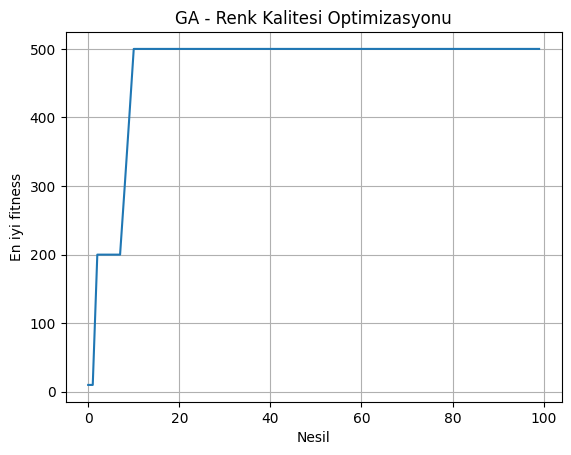

In [ ]:
plt.plot(history) #en iyi fitness değerini içerir
plt.xlabel("Nesil") #Yatay eksen nesilleri, dikey eksen ise en iyi renk kalitesi skorunu
plt.ylabel("En iyi fitness")
plt.title("GA - Renk Kalitesi Optimizasyonu")
plt.grid(True)
plt.show()

## Sonuçların Yorumlanması

Genetik Algoritma 100 nesil boyunca pigment karışımlarını optimize etmiş ve en iyi renk kalitesi puanını üreten karışım oranlarını bulmuştur.

- x1 = Pigment A yüzdesi
- x2 = Pigment B yüzdesi = 100 - x1

Sonuçlar:
- Pigment A genellikle yüksek çıkmıştır çünkü amaç fonksiyonu A pigmentini daha fazla ödüllendirmektedir.
- Grafik incelendiğinde GA yaklaşık 15–20. nesilde optimuma ulaşmış ve kararlı hale gelmiştir.

Bu sonuçlar senaryodaki tüm kısıtsal gereksinimlere uygundur.